In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inLine
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.utils import class_weight
from sklearn.model_selection import GridSearchCV


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# https://www.python-graph-gallery.com/

# Read File - X_test

In [4]:
# directory = r"C:\Users\Lital\Desktop\ML\Project_ML\part2\new\X_test_F.xlsx"
# X_test = pd.read_excel(directory)
# X_test = pd.DataFrame(X_test)
# X_test = pd.get_dummies(X_test, columns=['Blood_Pressure'])

# X_test

# Read File - Xy_train

In [3]:
# directory =r"C:\Users\Lital\Desktop\ML\Project_ML\part2\new\Xy_train_F.xlsx"
# df = pd.read_excel(directory)
# df = pd.DataFrame(df)

# X_train = df.drop('smoking', 1)
# y_train = df['smoking']
# X_train = pd.get_dummies(X_train, columns=['Blood_Pressure'])

# X_train

In [4]:
directory = r"C:\Users\RoiAz\Machine Learning Project\Part B\X_test_F.xlsx"
X_test = pd.read_excel(directory)
X_test = pd.DataFrame(X_test)
X_test = pd.get_dummies(X_test, columns=['Blood_Pressure'])

directory = r"C:\Users\RoiAz\Machine Learning Project\Part B\Xy_train_F.xlsx"
df = pd.read_excel(directory)
df = pd.DataFrame(df)

X_train = df.drop('smoking', 1)
y_train = df['smoking']
X_train = pd.get_dummies(X_train, columns=['Blood_Pressure'])

print("Done")

Done


In [7]:
x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

In [8]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.metrics import f1_score

scaler = StandardScaler()
scaler.fit(x_train)

X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(X_train_scaled)
data_pca = pca.fit_transform(X_train_scaled)
data_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
Y_train = pd.DataFrame(y_train).reset_index()['smoking']
data_pca['smoking'] = Y_train

In [10]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.22452474 0.12167921]
0.3462039449497961


In [11]:
data_pca.head(10)

,PC1,PC2,smoking
0,1.559216,-1.167239,0
1,1.463704,-0.312253,0
2,-1.321864,0.642242,0
3,-0.091168,-1.550334,1
4,1.146428,-0.632324,1
5,1.312863,0.520512,0
6,-0.770616,1.815981,0
7,0.134221,-3.523430,0
8,-2.988717,0.405393,0
9,0.738446,-1.460339,1


# AgglomerativeClustering

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

In [27]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
assignment = cluster.fit_predict(X_train_scaled)
data_pca['cluster']=cluster.fit_predict(X_train_scaled)
assignment1 = cluster.fit_predict(X_test_scaled)

In [29]:

print("Train Acc:")
print(round(accuracy_score(y_true=y_train, y_pred=assignment)*100,2),'%')
#test acc score
print("\nTest Acc:")
print(round(accuracy_score(y_true=y_test, y_pred=assignment1)*100,2),'%')

Train Acc:
63.42 %

Test Acc:
62.68 %


## Graph

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X_train_scaled, method='ward'))
plt.axhline(y=8, color='r', linestyle='--')

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
# Create a dendrogram using the linkage matrix
dend = shc.dendrogram(shc.linkage(data_pca, method='single'))
# Add a title to the plot
plt.title("Agglomerative Clustering Dendrogram")
# Display the plot
plt.show()

# Check

In [18]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from tqdm import tqdm

In [19]:
iner_list = []
dbi_list = []
sil_list = []

cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='single') 
assignment = cluster.fit_predict(X_train_scaled)
    
sil = silhouette_score(X_train_scaled, assignment)
dbi = davies_bouldin_score(X_train_scaled, assignment)
    
dbi_list.append(dbi)
sil_list.append(sil)

In [20]:
iner_list = []
dbi_list = []
sil_list = []

for n_clusters in tqdm(range(2, 10, 1)):
    cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='single') 
    assignment = cluster.fit_predict(X_train_scaled)
    
    sil = silhouette_score(X_train_scaled, assignment)
    dbi = davies_bouldin_score(X_train_scaled, assignment)
    
    dbi_list.append(dbi)
    sil_list.append(sil)
    

100%|██████████| 8/8 [10:06<00:00, 75.78s/it] 


In [21]:
sil_list

[0.43095642330404943,
 0.4118295843714888,
 0.40351298650625284,
 0.37283702598049245,
 0.3484375546834487,
 0.34688850470901245,
 0.3327063671384735,
 0.27810430180232015]

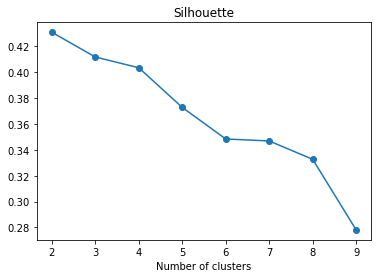

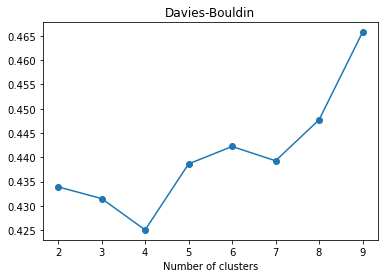

In [22]:
plt.plot(range(2, 10, 1), sil_list, marker='o')
plt.title("Silhouette")
plt.xlabel("Number of clusters")
plt.show()

plt.plot(range(2, 10, 1), dbi_list, marker='o')
plt.title("Davies-Bouldin")
plt.xlabel("Number of clusters")
plt.show()